<a href="https://colab.research.google.com/github/breves-r/Kmeans-clustering/blob/main/projeto_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Imports

Nessa seção iremos importar as bibliotecas necessárias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

###Carregar a base de dados
Abaixo iremos carregar a base de dados "Iris".
Disponível em: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

Obs: iremos considerar a variável de saída: **Iris-setosa**

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url,names=["0", "1", "2", "3", "target"])

In [ ]:
df

,0,1,2,3,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   target  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


###Tratamento dos dados
Aplique a padronização nos dados

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('target', axis=1))

In [ ]:
df_scaled = pd.DataFrame(df_scaled)

In [ ]:
df_scaled

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [ ]:
df_scaled.describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


###Análise exploratória
Plote um gráfico de dispersão para identificar visualmente o número de grupos. Realize esse plot para cada par de atributos, de modo a obter a melhor visualização.

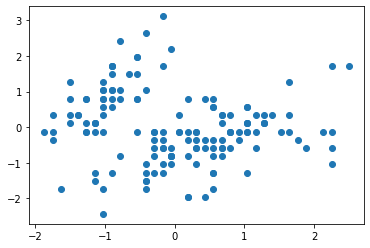

In [ ]:
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1])
plt.show()


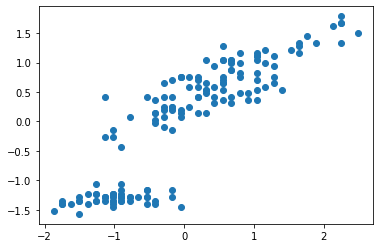

In [ ]:
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 2])
plt.show()

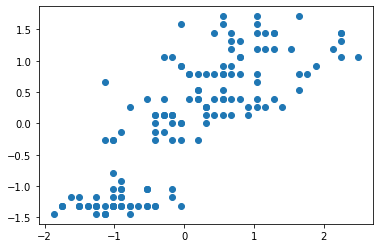

In [ ]:
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 3])
plt.show()

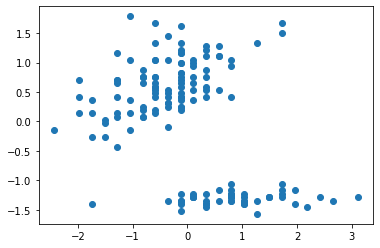

In [ ]:
plt.scatter(df_scaled.iloc[:, 1], df_scaled.iloc[:, 2])
plt.show()

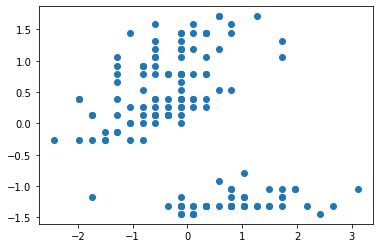

In [ ]:
plt.scatter(df_scaled.iloc[:, 1], df_scaled.iloc[:, 3])
plt.show()

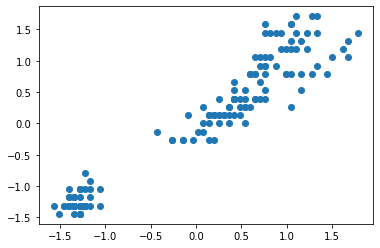

In [ ]:
plt.scatter(df_scaled.iloc[:, 2], df_scaled.iloc[:, 3])
plt.show()

Selecione as duas melhores features de acordo com as visualizações do passo anterior

In [ ]:
X = df_scaled[[2,3]]

###Método Elbow
Implemente o método elbow para encontrar o melhor número de grupos

*   Realize uma busca a partir de 2 grupos até 10
*   Utilize a inertia para avaliar a variação
*   Plote os valores da inertia em cada K

In [ ]:
n_clusters_candidates = [2, 3, 4, 5, 6, 7, 8, 9, 10]
values = []
for k in n_clusters_candidates:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0).fit(X)
    values.append(kmeans.inertia_)



Text(0, 0.5, 'Inertia')

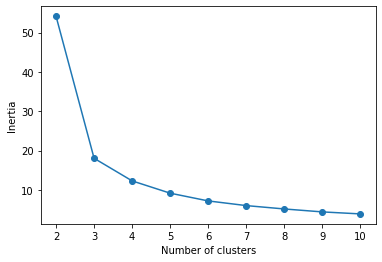

In [ ]:
frame = pd.DataFrame({'Cluster':n_clusters_candidates, 'Values':values})
plt.plot(frame['Cluster'], frame['Values'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

### Execute o K-Means

Execute o k-means com o K escolhido na etapa anterior

In [ ]:
model = KMeans(
    n_clusters=3,
    random_state=0,
    n_init=1,
    max_iter=1
)

model.fit(X)

y_predict = model.labels_

### Avaliação do K-Means
Imprima os índices da silhueta e NMI e plote o gráfico de dispersão com a saída do k-means

Obs: para calcular o NMI será necessário um tratamento para converter o tipo textual em numérico.

In [ ]:
y_true = df
y_true["target"] = pd.Categorical(y_true["target"])
y_true["target"] = y_true["target"].cat.codes

In [ ]:
y_true = y_true['target'].values

In [ ]:
sil = metrics.silhouette_score(X, y_predict, metric='euclidean')
nmi = metrics.normalized_mutual_info_score(y_true, y_predict)

print("Silhueta: ", sil)
print("NMI: ", nmi)

Silhueta:  0.6720085909727345
NMI:  0.8464828103876365


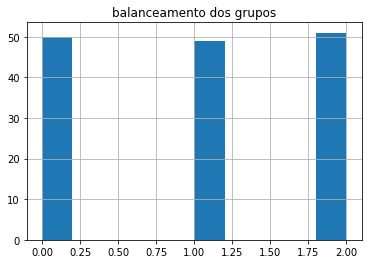

In [ ]:
_ = pd.DataFrame(y_predict).hist()
plt.title('balanceamento dos grupos')
plt.show()

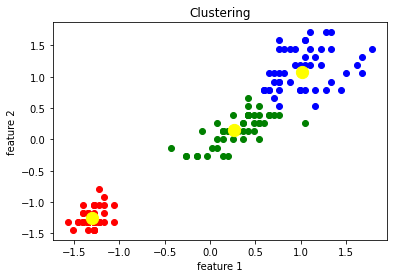

In [ ]:
plt.scatter(X.iloc[y_predict==0, 0], X.iloc[y_predict==0, 1], c='red')
plt.scatter(X.iloc[y_predict==1, 0], X.iloc[y_predict==1, 1], c='blue')
plt.scatter(X.iloc[y_predict==2, 0], X.iloc[y_predict==2, 1], c='green')

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=150, c='yellow', label = 'Centroids')
plt.title('Clustering')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()